In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy as sp
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from itertools import combinations
from sklearn.model_selection import cross_val_score
pd.set_option('display.max.columns', 500)
pd.set_option('display.max.rows', 500)
plt.style.use('seaborn-whitegrid')
plt.rc('font', family='Malgun Gothic')

In [ ]:
train=pd.read_csv('C:\\Users\\twa02\\Desktop\\Machine Learning\\퓨쳐스리그\\승률 파일\\승률데이터-분석.csv')

In [ ]:
train['H1']=train['HIT']-train['H2']-train['H3']-train['HR']

In [ ]:
train.describe()

,PA_B,AB_B,RBI_B,RUN_B,HIT_B,H2_B,H3_B,HR_B,SB_B,CS_B,SH_B,SF_B,BB_B,IB_B,HP_B,KK_B,GD_B,H1_B,OPB_B,SLG_B,OPS_B,AVG_B,PA_CUMSUM_B,AB_CUMSUM_B,RBI_CUMSUM_B,RUN_CUMSUM_B,HIT_CUMSUM_B,H2_CUMSUM_B,H3_CUMSUM_B,HR_CUMSUM_B,SB_CUMSUM_B,CS_CUMSUM_B,SH_CUMSUM_B,SF_CUMSUM_B,BB_CUMSUM_B,IB_CUMSUM_B,HP_CUMSUM_B,KK_CUMSUM_B,GD_CUMSUM_B,H1_CUMSUM_B,OPB_CUMSUM_B,SLG_CUMSUM_B,OPS_CUMSUM_B,AVG_CUMSUM_B,PA_INTER_B,AB_INTER_B,RBI_INTER_B,RUN_INTER_B,HIT_INTER_B,H2_INTER_B,H3_INTER_B,HR_INTER_B,SB_INTER_B,CS_INTER_B,SH_INTER_B,SF_INTER_B,BB_INTER_B,IB_INTER_B,HP_INTER_B,KK_INTER_B,GD_INTER_B,AVG_INTER_B,NEXT_AVG_B,GDAY_DS,ER,INN2,BF,PA,AB,HIT,H2,H3,HR,BB,IB,HP,KK,R,ERA,FIP,WHIP,ER_CUMSUM,INN2_CUMSUM,BF_CUMSUM,PA_CUMSUM,AB_CUMSUM,HIT_CUMSUM,H2_CUMSUM,H3_CUMSUM,HR_CUMSUM,BB_CUMSUM,IB_CUMSUM,HP_CUMSUM,KK_CUMSUM,R_CUMSUM,ERA_CUMSUM,FIP_CUMSUM,WHIP_CUMSUM,ER_INTER,INN2_INTER,BF_INTER,PA_INTER,AB_INTER,HIT_INTER,H2_INTER,H3_INTER,HR_INTER,BB_INTER,IB_INTER,HP_INTER,KK_INTER,R_INTER,ERA_INTER,W,L,D,W_CUMSUM,L_CUMSUM,D_CUMSUM,WINRATE_CUMSUM
count,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.00000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4.268000e+03,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000
mean,39.501406,34.843721,5.040300,5.332709,9.899250,1.775305,0.162371,1.010544,0.665417,0.312559,0.368088,0.336223,3.359419,0.114808,0.592081,6.877226,0.808341,6.951031,0.352217,0.421252,0.773469,0.277822,2563.192596,2259.516870,317.690722,337.14269,632.394564,112.086926,10.824508,63.266635,43.065370,20.602624,23.962512,21.180412,220.705717,7.502812,37.690487,456.873243,52.820759,446.216495,0.354765,0.419009,0.773775,0.277377,526.844189,464.337160,67.103093,71.029522,131.861762,23.700094,2.126757,13.392690,9.006092,4.271556,4.951265,4.510309,44.878397,1.502577,8.139878,91.466261,10.814199,0.282564,0.282185,2.017562e+07,4.872071,26.633786,152.204545,39.495314,34.844424,9.886832,1.768978,0.158388,1.007732,3.353327,0.112465,0.587395,6.867151,5.325679,5.022627,5.019046,1.501577,306.686973,1734.734770,9877.181350,2562.585286,2259.241097,631.821228,112.164246,10.782568,63.048735,220.286317,7.424789,37.750469,456.647376,336.544049,4.711709,4.878440,1.464812,65.097938,355.408857,2035.982896,527.883083,465.092081,132.456186,23.476570,2.246017,13.424789,45.481490,1.645501,7.708294,91.537020,71.068885,4.935173,0.496720,0.492971,0.010309,32.277179,32.166354,0.604264,0.500008
std,5.307621,4.312298,3.502956,3.611869,3.772555,1.409359,0.407475,1.101432,0.924907,0.565604,0.632443,0.579009,2.145660,0.371767,0.794109,2.650118,0.872895,2.934675,0.087308,0.156547,0.228539,0.081518,1243.876926,1096.123976,165.065235,174.51239,315.331625,57.984669,7.010313,37.379754,23.677451,11.655351,14.920852,12.163725,110.037689,4.589

In [ ]:
train_hitter=train[['PA_B', 'AB_B', 'RBI_B', 'HIT_B', 'H1_B', 'H2_B', 'H3_B',
                     'HR_B', 'SB_B', 'CS_B', 'SH_B', 'SF_B', 'BB_B', 'IB_B',
                     'HP_B', 'KK_B', 'GD_B', 'OPB_B', 'SLG_B', 'OPS_B', 'AVG_B', 'W', 'L', 'D', 'WINRATE_CUMSUM']]

train_pitcher=train[['ER', 'INN2', 'BF', 'PA','AB', 'HIT', 'H1', 'H2', 'H3', 'HR', 'BB', 'IB',
                     'HP', 'KK', 'R', 'ERA', 'FIP', 'WHIP', 'W', 'L', 'D', 'WINRATE_CUMSUM']]

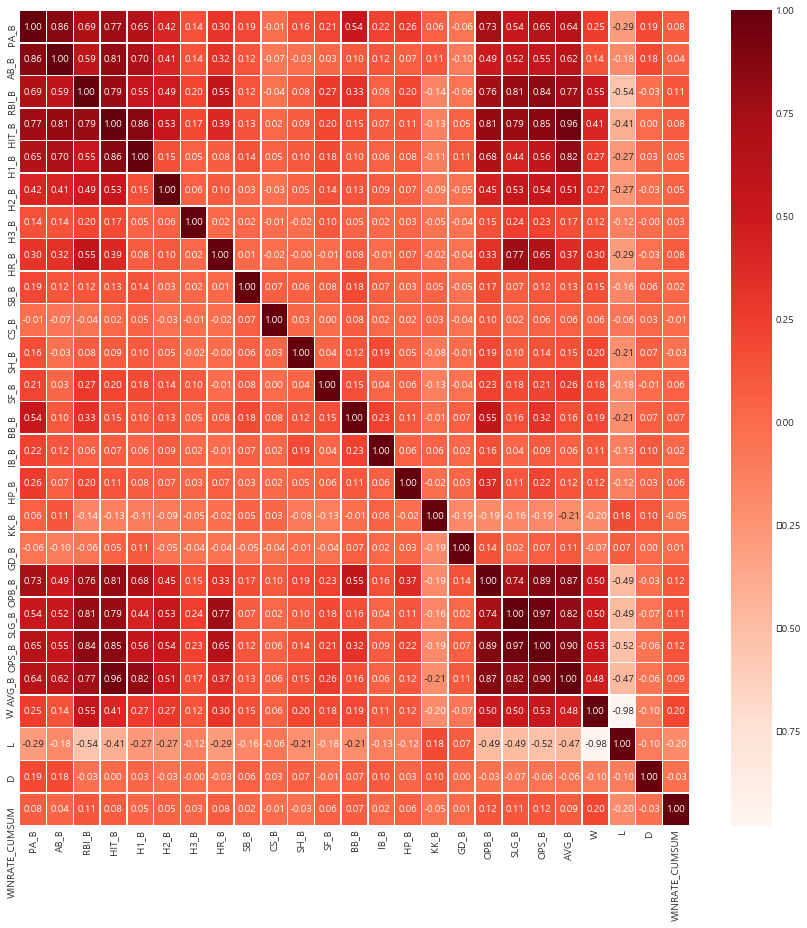

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train_hitter.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

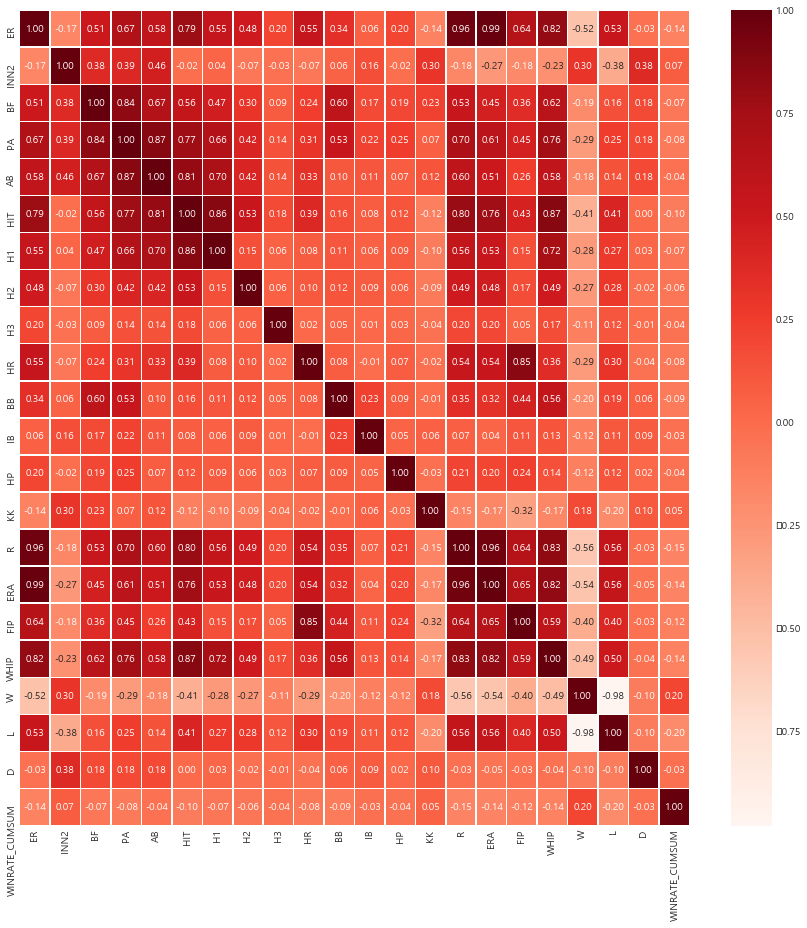

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train_pitcher.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

In [ ]:
train.corr()['WINRATE_CUMSUM']

PA_B              0.048471
AB_B             -0.008934
RBI_B             0.105150
RUN_B             0.106036
HIT_B             0.075492
H2_B              0.045210
H3_B              0.057530
HR_B              0.118179
SB_B              0.001318
CS_B              0.039159
SH_B              0.012922
SF_B              0.042596
BB_B              0.086503
IB_B              0.061784
HP_B              0.081378
KK_B             -0.059195
GD_B             -0.018706
H1_B              0.018840
OPB_B             0.144821
SLG_B             0.150940
OPS_B             0.159741
AVG_B             0.103225
PA_CUMSUM_B       0.056459
AB_CUMSUM_B       0.048832
RBI_CUMSUM_B      0.153427
RUN_CUMSUM_B      0.153355
HIT_CUMSUM_B      0.087948
H2_CUMSUM_B       0.101842
H3_CUMSUM_B       0.135288
HR_CUMSUM_B       0.138981
SB_CUMSUM_B       0.064198
CS_CUMSUM_B       0.027321
SH_CUMSUM_B      -0.099706
SF_CUMSUM_B       0.192568
BB_CUMSUM_B       0.113748
IB_CUMSUM_B       0.076474
HP_CUMSUM_B       0.151129
K

In [ ]:
train_real_x=train[['PA_B', 'AB_B', 'RBI_B', 'HIT_B', 'H1_B', 'H2_B', 'H3_B',
             'HR_B', 'SB_B', 'CS_B', 'SH_B', 'SF_B', 'BB_B', 'IB_B',
             'HP_B', 'KK_B', 'GD_B', 'OPB_B', 'SLG_B', 'OPS_B', 'AVG_B',
             'ER', 'INN2', 'BF', 'PA','AB', 'HIT', 'H1', 'H2', 'H3', 'HR', 'BB', 'IB',
             'HP', 'KK', 'R', 'ERA', 'FIP', 'WHIP'
            ]]

train_real_y=train['W']

In [ ]:
lg=LogisticRegression()

lg_model1=lg.fit(X=train_real_x, y=train_real_y)

In [ ]:
lg_model1.score(train_real_x, train_real_y)

0.9901593252108716

In [ ]:
lg_model1.predict_proba(train_real_x)

array([[1.00000000e+00, 7.72907335e-11],
       [8.05304123e-09, 9.99999992e-01],
       [1.00000000e+00, 5.87650574e-11],
       ...,
       [9.79098125e-01, 2.09018750e-02],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [ ]:
lg_model1.coef_

array([[-3.29598112e-01, -5.77455345e-01,  3.64449191e+00,
         8.90866497e-01,  1.96015164e-01,  3.46325713e-01,
         2.29090195e-01,  1.19435426e-01,  1.23754002e-01,
        -4.04089083e-01, -3.02224897e-01, -1.03092290e-01,
         3.25328814e-01, -4.34766351e-02,  3.10850699e-01,
        -6.88698621e-02, -7.12783260e-01,  1.35318104e-01,
         1.50023532e-01,  2.85341636e-01,  9.98501521e-02,
        -1.76177849e-01,  1.00731561e+00, -3.69602526e-03,
        -3.07839919e-01,  1.19954693e-01,  3.91102036e-02,
         1.10296933e-01,  2.49414903e-01,  1.20133782e-01,
        -4.40735414e-01,  1.81156345e-01, -3.24439896e-01,
         2.56876529e-01,  7.19452959e-02, -3.70900390e+00,
         1.95760881e-01,  3.58732364e-01,  3.08414755e-01]])

In [ ]:
train['logitWIN']=np.log(train['WINRATE_CUMSUM']/(1-train['WINRATE_CUMSUM']))

In [ ]:
np.abs(train.corr()['logitWIN']).sort_values(ascending=False)

logitWIN          1.000000
WINRATE_CUMSUM    0.997203
ERA_CUMSUM        0.696478
WHIP_CUMSUM       0.631431
FIP_CUMSUM        0.542777
OPB_CUMSUM_B      0.466640
OPS_CUMSUM_B      0.454806
SLG_CUMSUM_B      0.406171
ERA_INTER         0.385758
AVG_CUMSUM_B      0.354776
W_CUMSUM          0.344136
L_CUMSUM          0.305944
W                 0.239115
L                 0.232368
R_INTER           0.205844
ER_INTER          0.203632
HR_INTER          0.189877
SF_CUMSUM_B       0.180750
H3_INTER          0.176204
AVG_INTER_B       0.171370
WHIP              0.167742
R                 0.160820
ERA               0.150661
ER                0.148764
IB_CUMSUM         0.146567
R_CUMSUM          0.146566
ER_CUMSUM         0.143045
D_CUMSUM          0.140096
OPS_B             0.139613
BF                0.139127
RBI_CUMSUM_B      0.138713
RUN_CUMSUM_B      0.138615
HP_CUMSUM_B       0.137059
BB_INTER          0.135941
FIP               0.135937
SH_INTER_B        0.135010
OPB_B             0.134250
B

In [ ]:
np.abs(train.corr()['WINRATE_CUMSUM']).sort_values(ascending=False)

WINRATE_CUMSUM    1.000000
logitWIN          0.997203
ERA_CUMSUM        0.686847
WHIP_CUMSUM       0.624376
FIP_CUMSUM        0.554837
OPB_CUMSUM_B      0.527385
OPS_CUMSUM_B      0.515205
SLG_CUMSUM_B      0.463762
AVG_CUMSUM_B      0.416491
ERA_INTER         0.372665
W_CUMSUM          0.350825
L_CUMSUM          0.276438
W                 0.250277
L                 0.243392
AVG_INTER_B       0.218789
SF_CUMSUM_B       0.192568
R_INTER           0.180767
ER_INTER          0.178505
WHIP              0.171747
HR_INTER          0.167536
R                 0.161124
OPS_B             0.159741
RBI_CUMSUM_B      0.153427
RUN_CUMSUM_B      0.153355
H3_INTER          0.152651
HP_CUMSUM_B       0.151129
SLG_B             0.150940
ERA               0.150939
ER                0.149699
OPB_B             0.144821
HR_CUMSUM_B       0.138981
BF                0.137714
H3_CUMSUM_B       0.135288
HIT               0.132640
BB                0.131269
FIP               0.129328
IB_CUMSUM         0.128501
P

WINRATE_CUMSUM과 상관관계 큰 지표

ERA_CUMSUM, WHIP_CUMSUM, FIP_CUMSUM, OPB_CUMSUM_B, OPS_CUMSUM_B, SLG_CUMSUM_B, AVG_CUMSUM_B

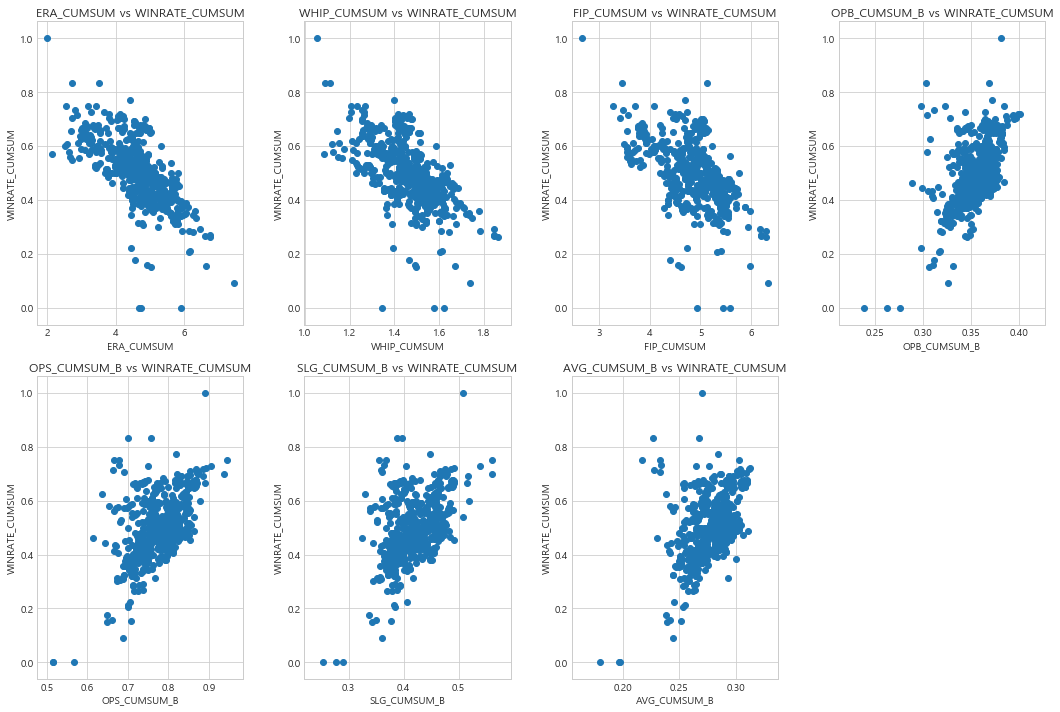

In [ ]:
plt.figure(figsize=[15, 10])

plt.subplot(2, 4, 1)
plt.scatter(train['ERA_CUMSUM'], train['WINRATE_CUMSUM'])
plt.xlabel('ERA_CUMSUM')
plt.ylabel('WINRATE_CUMSUM')
plt.title('ERA_CUMSUM vs WINRATE_CUMSUM')

plt.subplot(2, 4, 2)
plt.scatter(train['WHIP_CUMSUM'], train['WINRATE_CUMSUM'])
plt.xlabel('WHIP_CUMSUM')
plt.ylabel('WINRATE_CUMSUM')
plt.title('WHIP_CUMSUM vs WINRATE_CUMSUM')

plt.subplot(2, 4, 3)
plt.scatter(train['FIP_CUMSUM'], train['WINRATE_CUMSUM'])
plt.xlabel('FIP_CUMSUM')
plt.ylabel('WINRATE_CUMSUM')
plt.title('FIP_CUMSUM vs WINRATE_CUMSUM')

plt.subplot(2, 4, 4)
plt.scatter(train['OPB_CUMSUM_B'], train['WINRATE_CUMSUM'])
plt.xlabel('OPB_CUMSUM_B')
plt.ylabel('WINRATE_CUMSUM')
plt.title('OPB_CUMSUM_B vs WINRATE_CUMSUM')

plt.subplot(2, 4, 5)
plt.scatter(train['OPS_CUMSUM_B'], train['WINRATE_CUMSUM'])
plt.xlabel('OPS_CUMSUM_B')
plt.ylabel('WINRATE_CUMSUM')
plt.title('OPS_CUMSUM_B vs WINRATE_CUMSUM')

plt.subplot(2, 4, 6)
plt.scatter(train['SLG_CUMSUM_B'], train['WINRATE_CUMSUM'])
plt.xlabel('SLG_CUMSUM_B')
plt.ylabel('WINRATE_CUMSUM')
plt.title('SLG_CUMSUM_B vs WINRATE_CUMSUM')

plt.subplot(2, 4, 7)
plt.scatter(train['AVG_CUMSUM_B'], train['WINRATE_CUMSUM'])
plt.xlabel('AVG_CUMSUM_B')
plt.ylabel('WINRATE_CUMSUM')
plt.title('AVG_CUMSUM_B vs WINRATE_CUMSUM')

plt.tight_layout()
plt.show()

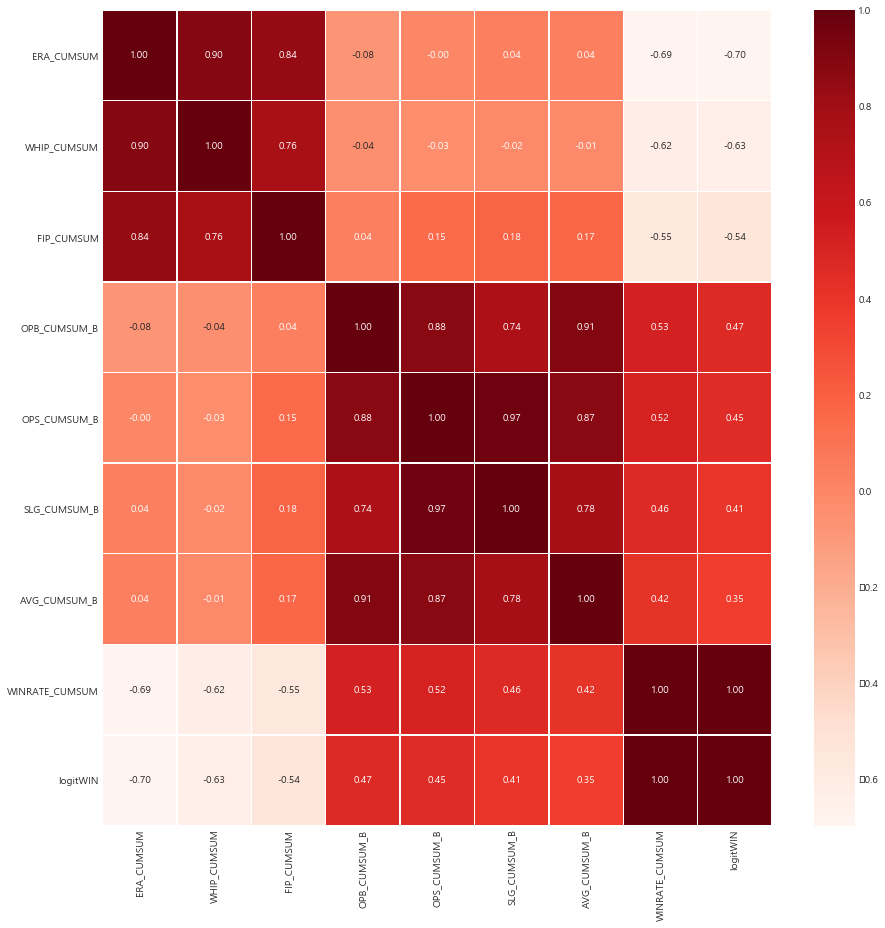

In [ ]:
train_feature=train[['ERA_CUMSUM', 'WHIP_CUMSUM', 'FIP_CUMSUM', 'OPB_CUMSUM_B', 'OPS_CUMSUM_B', 'SLG_CUMSUM_B', 'AVG_CUMSUM_B', 'WINRATE_CUMSUM', 'logitWIN']]

plt.figure(figsize=(15,15))
sns.heatmap(data = train_feature.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

타자 지표끼리 강한 상관관계, 투수 지표끼리 강한 상관관계를 가지고 있음
linear regression 돌릴 시 다중공산성 문제 발생 가능성 높음

# 기본 회귀분석

In [ ]:
lm_model=smf.ols('WINRATE_CUMSUM ~ERA_CUMSUM + WHIP_CUMSUM + FIP_CUMSUM + OPB_CUMSUM_B + OPS_CUMSUM_B + SLG_CUMSUM_B + AVG_CUMSUM_B', data=train_feature).fit()
lm_model.summary()

# multicollinearity 발생 - ridge or lasso 사용

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         WINRATE_CUMSUM   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     297.5
Date:                Sat, 26 Sep 2020   Prob (F-statistic):          3.74e-175
Time:                        19:44:14   Log-Likelihood:                 858.95
No. Observations:                 600   AIC:                            -1704.
Df Residuals:                     593   BIC:                            -1673.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0964      0.058      1.650      0.100      -0.018       0.211
ERA_CUMSUM      -0.0739      0.009     -8.609      0.000      -0.091      -0.057
WHIP_CUMSUM     -0.0087      0.048     -0.181      0.857      -0.103       0.085
FIP_CUMSUM      -0.0390      0.008     -4.679      0.000      -0.055      -0.023
OPB_CUMSUM_B     0.9947      0.235      4.228      0.000       0.533       1.457
OPS_CUMSUM_B     1.0328      0.112      9.204      0.000       0.812       1.253
SLG_CUMSUM_B     0.0381      0.142      0.268      0.789      -0.241       0.317
AVG_CUMSUM_B    -0.7755      0.393     -1.973      0.049      -1.547      -0.004
==============================================================================
Omnibus:                       38.659   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.401
Skew:                           0.258   Prob(JB):                     6.45e-25
Kurtosis:                       5.047   Cond. No.                     1.36e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
lm_model2=sm.OLS.from_formula('WINRATE_CUMSUM ~ERA_CUMSUM + WHIP_CUMSUM + FIP_CUMSUM + OPB_CUMSUM_B + OPS_CUMSUM_B + SLG_CUMSUM_B + AVG_CUMSUM_B', data=train_feature)
result=lm_model2.fit()
result_lasso = lm_model2.fit_regularized(alpha=0.01, L1_wt=1)
result_ridge = lm_model2.fit_regularized(alpha=0.01, L1_wt=0)

print('lasso_parameter')
print(result_lasso.params)
print('-----------------------')
print('ridge_parameter')
print(result_ridge.params)

lasso_parameter
Intercept       0.432260
ERA_CUMSUM     -0.011823
WHIP_CUMSUM     0.000000
FIP_CUMSUM      0.017323
OPB_CUMSUM_B    0.000000
OPS_CUMSUM_B    0.036316
SLG_CUMSUM_B    0.000000
AVG_CUMSUM_B    0.000000
dtype: float64
-----------------------
ridge_parameter
[ 0.25378998 -0.11919061  0.14130978  0.03407666  0.14178907  0.34327623
  0.20148716  0.10874411]


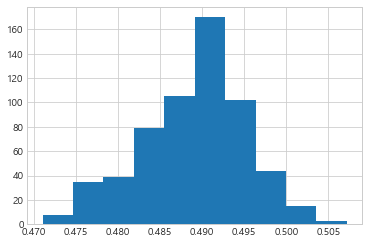

In [ ]:
plt.hist(result_lasso.fittedvalues)
plt.show()

In [ ]:
result_lasso.params

Intercept       0.432260
ERA_CUMSUM     -0.011823
WHIP_CUMSUM     0.000000
FIP_CUMSUM      0.017323
OPB_CUMSUM_B    0.000000
OPS_CUMSUM_B    0.036316
SLG_CUMSUM_B    0.000000
AVG_CUMSUM_B    0.000000
dtype: float64